In [1]:
# The program depicts how to use Validation curve in Randomforest using the datasets in sklearn package.   
    
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn import datasets
    from sklearn.ensemble import RandomForestClassifier
    from sklearn.model_selection import validation_curve

In [4]:
digits = datasets.load_iris()

X, y = digits.data, digits.target

Here we are using RandomForestClassifier so first we have to define a object for the range of parameters on which we have to use the validation curve. So we have created an object param_range for that.

Now before using Validation curve, let us first see its parameters:

        estimator : In this we have to pass the metric or the model for which we need to optimize the parameters.
        param_name : In this we have to pass the names of parameters on which we have to use the validation curve.

li

        > 

param_range

    : In this we have to pass the range of values of parameter on which we have to use the validation curve.
    cv : In this we have to pass a interger value, as it signifies the number of splits that is needed for cross validation. By default is set as five.
    scoring : This signifies the metric of calculating the score.
    n_jobs : This signifies the number of jobs to be run in parallel, -1 signifies to use all processor.


In [5]:
param_range = np.arange(1, 250, 2)

train_scores, test_scores = validation_curve(RandomForestClassifier(),X, y, 
                                             param_name="n_estimators", param_range=param_range,cv=4, scoring="accuracy", n_jobs=-1)

In [6]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

First we are plotting the mean accuracy scores for both the training and the testing set. Then the accuracy band for the training and testing sets. Finally the few lines is of the other setting like size , legend etc for the plot.

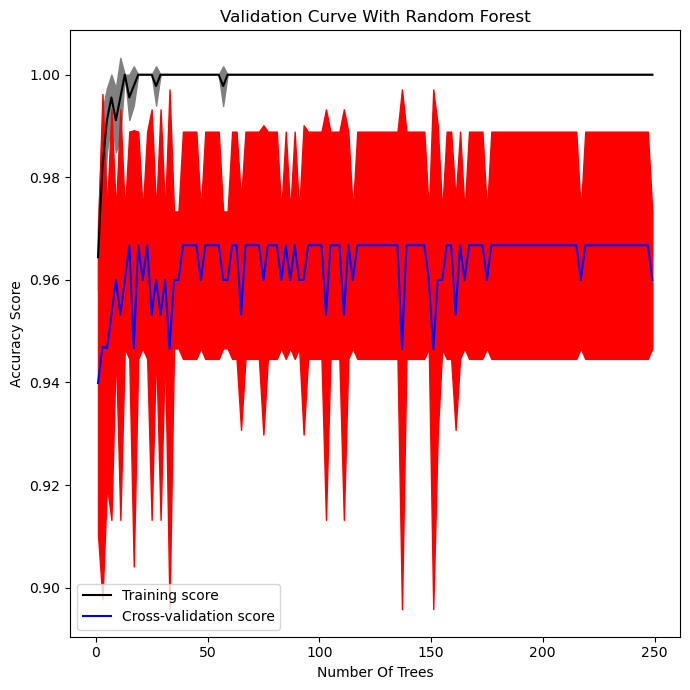

In [9]:
    plt.subplots(1, figsize=(7,7))
    plt.plot(param_range, train_mean, label="Training score", color="black")
    plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

    plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
    plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="red")
 
    plt.title("Validation Curve With Random Forest")
    plt.xlabel("Number Of Trees")
    plt.ylabel("Accuracy Score")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()